In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [52]:
# Load your dataset
df = pd.read_csv('/kaggle/input/restaurant-dataset/Restaurant_data.csv')

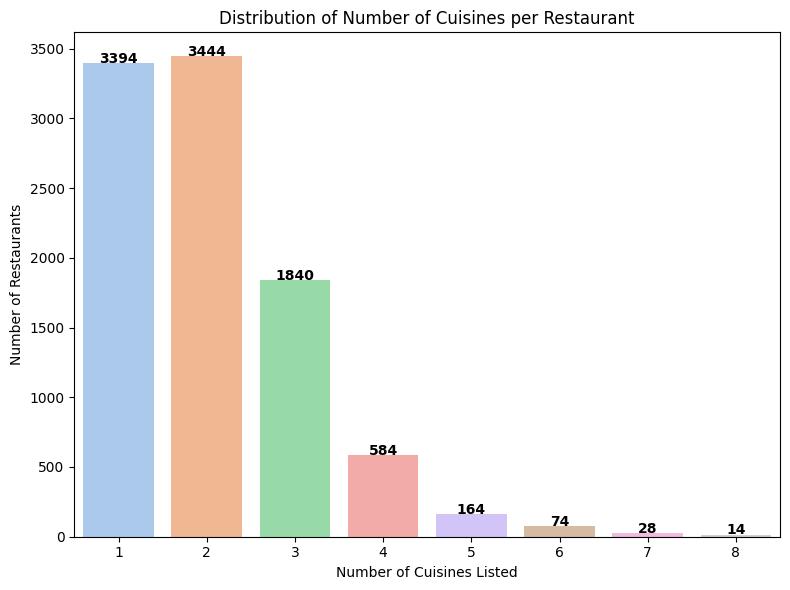

In [53]:
# Visualize number of cuisines per restaurant (Bar Chart)
plt.figure(figsize=(8,6))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, palette='pastel')
plt.xlabel('Number of Cuisines Listed')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Number of Cuisines per Restaurant')

# Add counts on top of bars
for i, v in enumerate(cuisine_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [54]:
# Handle missing values
df = df.dropna(subset=['Cuisines', 'Average Cost for two', 'Aggregate rating'])

In [55]:
# Extract the primary (first) cuisine for single-label classification
df['Primary Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

In [56]:
# Remove cuisines with only 1 restaurant
cuisine_counts = df['Primary Cuisine'].value_counts()
valid_cuisines = cuisine_counts[cuisine_counts > 1].index
df = df[df['Primary Cuisine'].isin(valid_cuisines)]

# Re-encode labels after filtering
df['Cuisine_Label'] = le_cuisine.fit_transform(df['Primary Cuisine'])

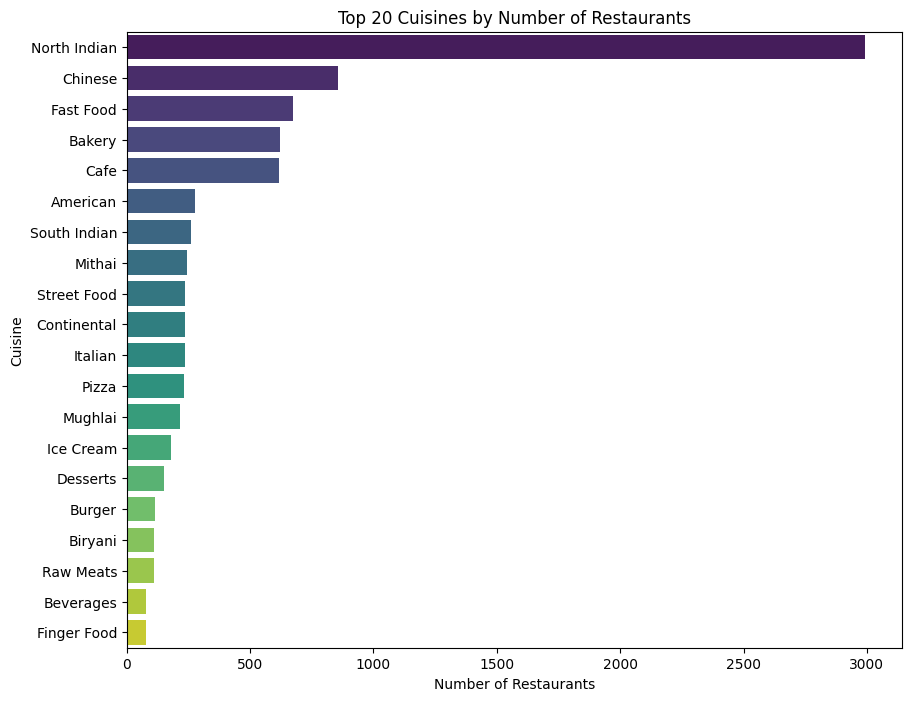

In [57]:
# Count the number of occurrences of each cuisine in the dataset
top_cuisines = df['Primary Cuisine'].value_counts().head(20)  # Get top 20 cuisines

# Plot the top 20 cuisines in a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')  # Horizontal bar chart
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.title('Top 20 Cuisines by Number of Restaurants')
plt.show()

In [58]:
print(df['Primary Cuisine'].value_counts())

Primary Cuisine
North Indian      2992
Chinese            855
Fast Food          672
Bakery             621
Cafe               617
                  ... 
South American       2
Grill                2
Singaporean          2
Drinks Only          2
Oriya                2
Name: count, Length: 98, dtype: int64


In [59]:
# Encode categorical features
le_cuisine = LabelEncoder()
df['Cuisine_Label'] = le_cuisine.fit_transform(df['Primary Cuisine'])

le_city = LabelEncoder()
df['City_Label'] = le_city.fit_transform(df['City'])

In [60]:
# Feature selection
features = df[['Average Cost for two', 'Aggregate rating', 'City_Label']]
target = df['Cuisine_Label']

In [61]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [62]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [64]:
# Predict and evaluate
y_pred = model.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred) * 100 
print(f"Overall Accuracy: {accuracy:.2f}%")  

Overall Accuracy: 31.44%
